In [216]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20]

In [107]:
train_data = pd.read_csv("data/train.csv")
print(train_data.cabin_code)

0      none
1         C
2      none
3         C
4      none
       ... 
886    none
887       B
888    none
889       C
890    none
Name: cabin_code, Length: 891, dtype: object


In [100]:
train_data['Honorific'].head()

0      Mr.
1     Mrs.
2    Miss.
3     Mrs.
4      Mr.
Name: Honorific, dtype: object

In [101]:
test_data = pd.read_csv("data/test.csv")

In [102]:
test_data['Honorific'].head()

0     Mr.
1    Mrs.
2     Mr.
3     Mr.
4    Mrs.
Name: Honorific, dtype: object

In [328]:
#testing cell
y = train_data["Survived"]


features = ["Pclass", "Sex", "age_bin", "Fare", "cabin_code",
           "Honorific", "ticket_group"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features], dummy_na=True)

X, X_test = X.align(X_test, join='left', axis=1)

X_test.fillna(value=0, inplace=True)

z_max = 0
z_max_score = 0
for z in range(100):
    model = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=55, 
                                   min_samples_leaf=6, max_features=8)
    #model = GradientBoostingClassifier()
    #model = SVC()
    model.fit(X,y)
    print(z)
    if model.score(X,y) > z_max_score:
        z_max_score = model.score(X,y)
        z_max = z
    print("Accuracy on training set: {:.3f}".format(model.score(X, y)))

predictions=model.predict(X_test)

print(z_max)
print(z_max_score)




0
Accuracy on training set: 0.859
1
Accuracy on training set: 0.846
2
Accuracy on training set: 0.829
3
Accuracy on training set: 0.826
4
Accuracy on training set: 0.823
5
Accuracy on training set: 0.836
6
Accuracy on training set: 0.826
7
Accuracy on training set: 0.811
8
Accuracy on training set: 0.811
9
Accuracy on training set: 0.799
10
Accuracy on training set: 0.795
11
Accuracy on training set: 0.793
12
Accuracy on training set: 0.797
13
Accuracy on training set: 0.798
14
Accuracy on training set: 0.799
15
Accuracy on training set: 0.799
16
Accuracy on training set: 0.798
17
Accuracy on training set: 0.796
18
Accuracy on training set: 0.796
19
Accuracy on training set: 0.796
20
Accuracy on training set: 0.796
21
Accuracy on training set: 0.792
22
Accuracy on training set: 0.793
23
Accuracy on training set: 0.792
24
Accuracy on training set: 0.793
25
Accuracy on training set: 0.793
26
Accuracy on training set: 0.793
27
Accuracy on training set: 0.795
28
Accuracy on training set: 0

In [329]:
y = train_data["Survived"]


features = ["Pclass", "Sex", "age_bin", "Fare", "cabin_code",
           "Honorific", "ticket_group"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features], dummy_na=True)

X, X_test = X.align(X_test, join='left', axis=1)

X_test.fillna(value=0, inplace=True)

model = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=55, 
                                   min_samples_leaf=6, max_features=8)

model.fit(X,y)
print("Accuracy on training set: {:.3f}".format(model.score(X, y)))

predictions=model.predict(X_test)

output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

Accuracy on training set: 0.836
Your submission was saved!


In [284]:
y = train_data["Survived"]


features = ["Pclass", "Sex", "age_bin", "SibSp", "Parch", "Fare", "cabin_code",
           "Honorific", "ticket_group"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features], dummy_na=True)

X, X_test = X.align(X_test, join='left', axis=1)


X_test['age_bin_less than 75'] = X_test['age_bin_less than 75'].fillna(value=0)
X_test['age_bin_less than 85'] = X_test['age_bin_less than 85'].fillna(value=0)
X_test.fillna(value=0, inplace=True)


#model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=1, min_samples_leaf=20)
#model = tree.DecisionTreeClassifier(max_depth=6, random_state=1, min_samples_leaf=20)
#model = tree.DecisionTreeClassifier()
#model = tree.DecisionTreeClassifier(max_depth=5, random_state=1, min_samples_leaf=19)
model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=8, 
                               max_features=3,random_state=36)


model.fit(X,y)
print("Accuracy on training set: {:.3f}".format(model.score(X, y)))

predictions=model.predict(X_test)




z_max = 0
z_max_score = 0
"""for z in range(100):
    model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=8, 
                               max_features=3,random_state=z)
    #model = GradientBoostingClassifier()
    #model = SVC()
    model.fit(X,y)
    print(z)
    if model.score(X,y) > z_max_score:
        z_max_score = model.score(X,y)
        z_max = z
    print("Accuracy on training set: {:.3f}".format(model.score(X, y)))
"""
predictions=model.predict(X_test)

print(z_max)
print(z_max_score)


output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

Accuracy on training set: 0.823
0
0
Your submission was saved!


In [129]:
import graphviz

columns=list(X_test.columns)
dot_data = tree.export_graphviz(model,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image13",view=True)


AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

In [105]:
#Following 2 lines
columns = X.columns
columns.tolist()


['Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'age_bin_less than 10',
 'age_bin_less than 20',
 'age_bin_less than 25',
 'age_bin_less than 30',
 'age_bin_less than 35',
 'age_bin_less than 45',
 'age_bin_less than 5',
 'age_bin_less than 50',
 'age_bin_less than 55',
 'age_bin_less than 60',
 'age_bin_less than 65',
 'age_bin_less than 70',
 'age_bin_less than 75',
 'age_bin_less than 85',
 'age_bin_less thank 15',
 'age_bin_less thank 40',
 'age_bin_unknown',
 'cabin_code_A',
 'cabin_code_B',
 'cabin_code_C',
 'cabin_code_D',
 'cabin_code_E',
 'cabin_code_F',
 'cabin_code_G',
 'cabin_code_T',
 'cabin_code_none',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Honorific_Capt.',
 'Honorific_Col.',
 'Honorific_Don.',
 'Honorific_Dr.',
 'Honorific_Jonkheer.',
 'Honorific_Lady.',
 'Honorific_Major.',
 'Honorific_Master.',
 'Honorific_Miss.',
 'Honorific_Mlle.',
 'Honorific_Mme.',
 'Honorific_Mr.',
 'Honorific_Mrs.',
 'Honorific_Ms.',
 'Honorific_Rev.',
 'Honorific_Si

In [95]:
print("Feature importances:\n{}".format(model.feature_importances_))

Feature importances:
[0.14093575 0.         0.0008988  0.20004059 0.04384309 0.
 0.         0.         0.00227607 0.00210688 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01142277 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.59847605 0.
 0.         0.         0.         0.        ]


In [96]:
def plot_feature_importances_titanic(model):
    n_features = X_test.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    

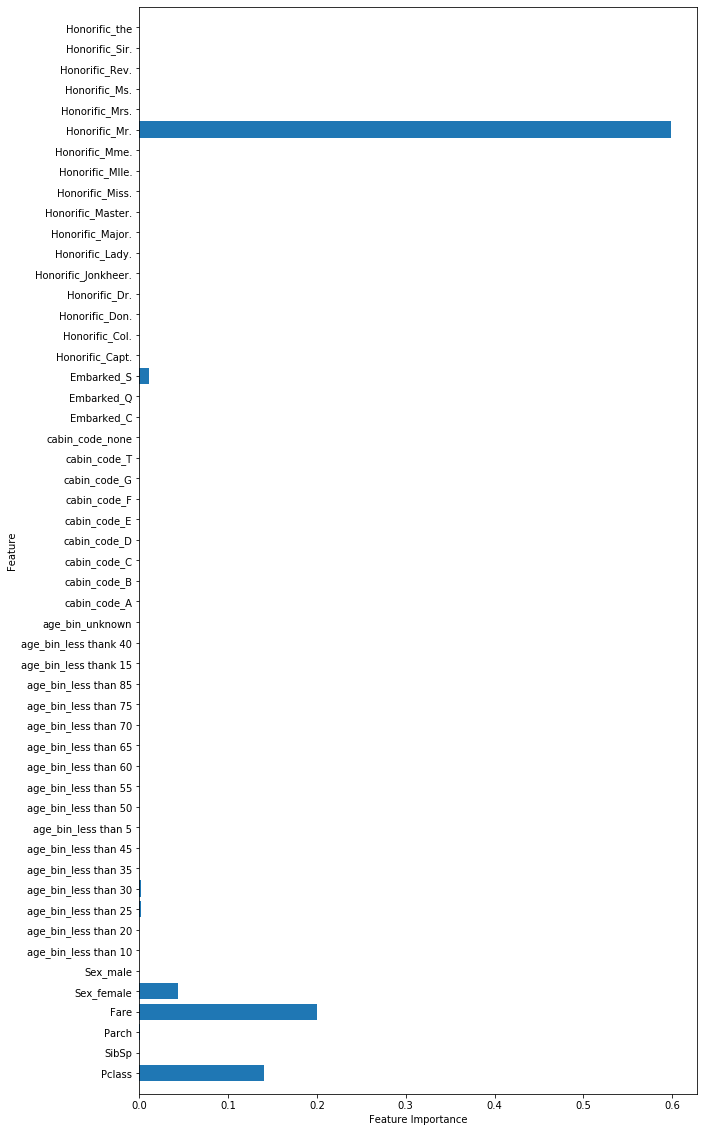

In [97]:
plot_feature_importances_titanic(model)